## Einfache Lineare Regression



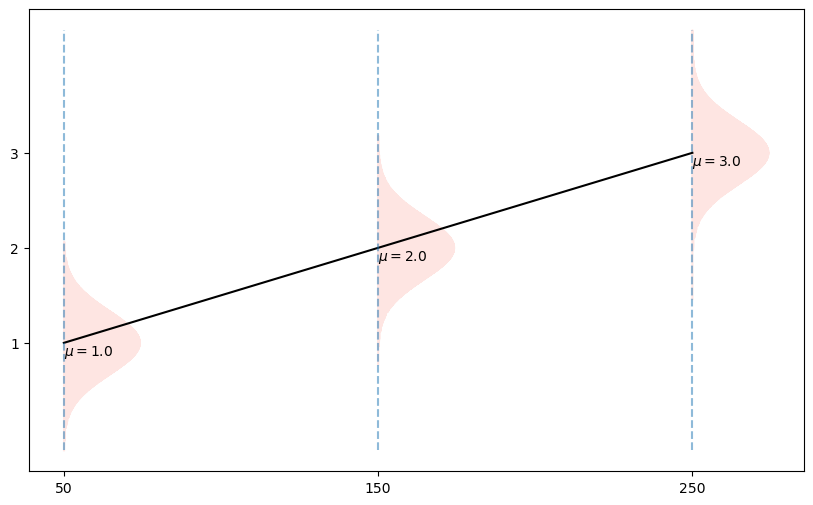

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define variables
x_breaks = np.array([50, 150, 250])
y_hat = 0.5 + 0.01 * x_breaks

# Create a DataFrame similar to expand_grid in R
dt = pd.DataFrame(np.array(np.meshgrid(np.arange(1, 2001), x_breaks)).T.reshape(-1,2), columns=['B', 'x'])

# Add mu, y, and dy columns
dt['mu'] = 0.5 + 0.01 * dt['x']
dt['y'] = np.random.normal(loc=dt['mu'], scale=0.33)
dt['dy'] = dt['x'] + 20 * norm.pdf(dt['y'], loc=dt['mu'], scale=0.33)

# Sort values
dt = dt.sort_values(['x', 'dy'])

# Plotting
plt.figure(figsize=(10, 6))

# Assuming 'invoices' is a DataFrame with 'Invoices' and 'Time' columns
# plt.scatter(invoices['Invoices'], invoices['Time'], alpha=0.5)

for x_val in dt['x'].unique():
    dt_x = dt[dt['x'] == x_val]
    plt.plot(dt_x['dy'], dt_x['y'], alpha=0.2, color='salmon')

plt.plot(dt['x'], dt['mu'], color='black')
plt.vlines(x_breaks, ymin=dt['y'].min(), ymax=dt['y'].max(), linestyles='dashed', alpha=0.5)

for x_val, y_val in zip(x_breaks, y_hat):
    plt.text(x_val, y_val, r'$\mu = {}$'.format(round(y_val, 1)), va='top')

plt.xticks(x_breaks)
plt.yticks(0.5 + 0.01 * x_breaks)
plt.show()

## Die einfache lineare Regression in Matrixform

Unsere Modellgleichung, die wir für die Vorhersage der Bearbeitungszeit verwenden, war:

$$
\hat{\text{Time}} = \hat{\beta}_0 + \hat{\beta}_1 \text{Rechnungeen}
$$

Nun wollen wir dieselbe Gleichung in Matrixform schreiben. Dazu schreiben wir diese Modellgleichung
für alle Beobachtungen in unserem Datensatz auf:

$$
\begin{align*}
\hat{\text{Time}}_1 &= \hat{\beta}_0 + \hat{\beta}_1 \text{Rechnungeen}_1 \\
\hat{\text{Time}}_2 &= \hat{\beta}_0 + \hat{\beta}_1 \text{Rechnungeen}_2 \\
\hat{\text{Time}}_3 &= \hat{\beta}_0 + \hat{\beta}_1 \text{Rechnungeen}_3 \\
\vdots \\
\hat{\text{Time}}_n &= \hat{\beta}_0 + \hat{\beta}_1 \text{Rechnungeen}_n \\
\end{align*}
$$

Nun laßt uns die obigen Gleichungen in Matrixform schreiben.

$$
\begin{bmatrix}
\hat{\text{Time}}_1 \\
\hat{\text{Time}}_2 \\
\hat{\text{Time}}_3 \\
\vdots \\
\hat{\text{Time}}_n \\
\end{bmatrix}
=
\begin{bmatrix}
1 & \text{Rechnungeen}_1 \\
1 & \text{Rechnungeen}_2 \\
1 & \text{Rechnungeen}_3 \\
\vdots & \vdots \\
1 & \text{Rechnungeen}_n \\
\end{bmatrix}
\begin{bmatrix}
\hat{\beta}_0 \\
\hat{\beta}_1 \\
\end{bmatrix}

$$


## Scenarios

Die Koeffizienten in Regressionsmodellen vergleichen verschiedene Szenarien. Es ist unsere Aufgabe, die Modelle so aufzustellen, dass wir sinnvolle Vergleiche anstellen können.

Insbesonderen in Modellen mit Interaktionseffekten ist es wichtig, die Variablen zu skalieren (XXX, w), um den Koeffizienten eine sinnvolle Interpretation zu geben.

## Anmerkung

Die Variablen, die wir in den Modellen verwenden, nennen wir auch Prädiktoren

## Interpretation

Es gibt zwei Interpretationen der Koeffizienten in Regressionsmodellen (XXX, check):

- Vorhersage: 

